# Statistical Analysis

In [4]:
import numpy as np
import pandas as pd
import statistics
from sklearn import metrics
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

1) Find summary statistics of each column
2) plot frequency of answers for each column (answer on h-axis, freq. on v-axis)
3) Draw pair plot the columns (no. of cols is high, so draw bigger figure and save the figure)
4) Find covariance & correlation between each pair of cols
5) Find correlation g covariance between each col and outcome col
6) Use student t-test to find significant relation between each col and outcome (Find p-values)
7) Find sensitivity & specificity of each col as indicator (test) of outcome (truth). Note: multi-value test & - bidirectional truth
8) Plot the confusion matrix for each col x outcome
9) Calculate precision, accuracy, Positive Predictive Value (PPV), Negative Predictive Value (NPV)
10) Find the precision, accuracy, Positive Predictive Value (PPV), Negative Predictive Value (NPV) in idvance way
11) sort dataframe W.R.T all Values calculated (Sen, Spc, PPV, NPV)
12) Find the best answer for each col as most sensitive, most specific, and both
13) Report cols with most accurate predictor

In [5]:
data = pd.read_csv('total_binary_01.csv')
data.head()

,id,id_merge,wave,age,sex_recode,age_4groups,education_2groups,education_4groups,marital_status_3groups,job_status_5groups,...,factor2_confidence,factor3_convenience,factor4_calculation,factor5_complacency,factor6_side_effect,attitude_total,easy_hard_vaccineinformation,easy_hard_access_to_vaccine,easy_hard_total,outcome
0,827,827,1,21,0,1,1,4,1,5,...,33,21,12,22,14,165,1,4,5,0
1,938,938,1,21,0,1,1,3,1,4,...,10,19,13,11,2,82,1,7,8,1
2,977,2230,2,19,0,1,0,3,1,4,...,17,21,15,25,5,116,2,6,8,0
3,1027,2280,2,23,0,1,0,4,1,5,...,25,21,15,25,11,148,2,3,5,0
4,1159,3671,3,22,0,1,1,3,1,1,...,29,21,15,27,2,141,1,3,4,0


1) separating column `outcome`
2) dropping column `id` and `id_merge` and `outcome`
3) changing the names to make the process Blind
4) shuffiling columns
5) adding `outcome` as the last column
6) shuffling rows

In [6]:
# to re-run this cell, uncomment the line below
# data = pd.read_csv('total_binary_01.csv')

y = data[['outcome']]
data.drop(columns=['id', 'id_merge', 'outcome'], inplace=True)

In [7]:
# making list "names" for labeled columns
a = [chr(i) for i in range(65,91)]
b = ['A' + chr(i) for i in range(65,91)]
c = ['B' + chr(i) for i in range(65,89)]
names = a + b + c

In [8]:
# Shuffling columns
col_list = list(data.columns)
np.random.seed(42)
np.random.shuffle(col_list)
 
 #Changing column names
data = pd.DataFrame(data, columns=col_list)

# Changing names to blind
cache = {j:i for i,j in zip (list(data.columns), names)}
data.columns = names

# Concatinating the outcome column with the huffled df
data = pd.concat((data, y), axis = 1)

# Shuffling rows
data = data.sample(frac=1, random_state=42)
data

,A,B,C,D,E,F,G,H,I,J,...,BP,BQ,BR,BS,BT,BU,BV,BW,BX,outcome
2053,1,1,0,1,6,5,138,7,7,1,...,7,1,1,1,24,7,4,6,6,0
3052,1,1,0,2,7,6,168,4,7,1,...,6,5,1,1,14,7,12,4,7,0
220,1,0,1,1,7,7,180,7,7,1,...,7,7,0,2,13,7,12,3,7,0
2658,1,1,0,3,7,5,156,5,7,1,...,5,7,1,5,20,7,8,4,6,0
3291,1,1,0,1,7,4,129,7,1,1,...,7,5,1,2,14,7,2,4,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,1,1,1,3,6,6,117,5,3,0,...,5,6,0,2,23,6,8,6,5,0
1294,1,1,1,3,4,3,119,1,7,1,...,1,4,0,3,9,4,7,2,4,0
860,1,0,1,1,2,6,128,7,7,0,...,7,2,0,1,9,6,12,2,4,0
3507,1,1,0,1,7,7,181,7,7,1,...,7,6,1,1,28,7,14,6,7,0


### Now the data's columns are encoded and rows are shuffled
### No Selection Bias
## resetting indices and let's start

In [9]:
data = data.reset_index(drop=True)
data

,A,B,C,D,E,F,G,H,I,J,...,BP,BQ,BR,BS,BT,BU,BV,BW,BX,outcome
0,1,1,0,1,6,5,138,7,7,1,...,7,1,1,1,24,7,4,6,6,0
1,1,1,0,2,7,6,168,4,7,1,...,6,5,1,1,14,7,12,4,7,0
2,1,0,1,1,7,7,180,7,7,1,...,7,7,0,2,13,7,12,3,7,0
3,1,1,0,3,7,5,156,5,7,1,...,5,7,1,5,20,7,8,4,6,0
4,1,1,0,1,7,4,129,7,1,1,...,7,5,1,2,14,7,2,4,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3765,1,1,1,3,6,6,117,5,3,0,...,5,6,0,2,23,6,8,6,5,0
3766,1,1,1,3,4,3,119,1,7,1,...,1,4,0,3,9,4,7,2,4,0
3767,1,0,1,1,2,6,128,7,7,0,...,7,2,0,1,9,6,12,2,4,0
3768,1,1,0,1,7,7,181,7,7,1,...,7,6,1,1,28,7,14,6,7,0


## 1
finding the summary of our data

In [10]:
data.describe()

,A,B,C,D,E,F,G,H,I,J,...,BP,BQ,BR,BS,BT,BU,BV,BW,BX,outcome
count,3770.000000,3770.000000,3770.000000,3770.000000,3770.000000,3770.000000,3770.000000,3770.000000,3770.000000,3770.000000,...,3770.000000,3770.000000,3770.000000,3770.000000,3770.000000,3770.000000,3770.000000,3770.000000,3770.000000,3770.000000
mean,0.645623,0.706366,0.608488,2.001326,6.200531,5.501857,144.758886,5.206101,6.183554,0.745889,...,5.229973,5.559947,0.462334,2.830769,16.359151,5.801326,8.189125,3.196286,5.680106,0.075862
std,0.478387,0.455487,0.488153,0.816225,1.240127,1.921274,26.603382,2.136920,1.563291,0.435418,...,2.130874,1.704251,0.498645,1.864900,6.581040,1.707614,3.849040,1.624366,1.834359,0.264812
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,45.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,4.000000,1.000000,2.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,6.000000,4.000000,129.000000,4.000000,6.000000,0.000000,...,4.000000,5.000000,0.000000,1.000000,11.000000,5.000000,5.000000,2.000000,5.000000,0.000000
50%,1.000000,1.000000,1.000000,2.000000,7.000000,6.000000,150.000000,6.000000,7.000000,1.000000,...,6.000000,6.000000,0.000000,2.000000,16.000000,7.000000,8.000000,3.000000,7.000000,0.000000
75%,1.000000,1.000000,1.000000,3.000000,7.000000,7.000000,165.000000,7.000000,7.000000,1.000000,...,7.000000,7.000000,1.000000,4.000000,22.000000,7.000000,12.000000,4.000000,7.000000,0.000000
max,1.000000,1.000000,1.000000,3.000000,7.000000,7.000000,189.000000,7.000000,7.000000,1.000000,...,7.000000,7.000000,1.000000,7.000000,28.000000,7.000000,14.000000,7.000000,7.000000,1.000000


## 2
Analysing the frequency of each data by plotting each one <br>
in folder `Frequencies`

PAY ATTENTION<br>
`fig = plt.figure()`<br>
`plt.clf()`<br>
We get an answer from this code and that will be:<br>
`<Figure size 640x480 with 0 Axes>`

In [18]:
for col in data.columns:
    _df = data.loc[:,col].sort_index()
    y = _df.value_counts().values
    x = _df.value_counts().index
    plt.bar(x=x, height=y)
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.title(col)
    name = "Frequencies/" + col 
    plt.savefig(name)
    plt.clf()

<Figure size 640x480 with 0 Axes>

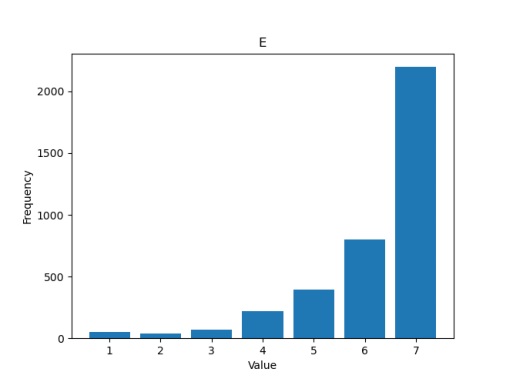

In [19]:
img = plt.imread('Frequencies/E.png')
plt.imshow(img)
plt.axis('off')
plt.show()

## 3  , 4 , 5
- It will takes about 12 minutes
- Draw pair plot the columns
- In this way we can analysing the pairs correlation and covariance
Then we put the corr and cov for each pair in a dictionary named: `corr_and_cov`
- for outcome We'll make a diffrent dictionary named: `outcome_corr_cov`
- putting the figures in folder named: `Pair_plots`
- putting the outcome figures in folder named: `Outcome_plots`

In [13]:
corr_and_cov = {}
outcome_cov_cor = {}
for col_x in data.columns:
    for col_y in data.columns:
        df = data.loc[:,[col_x, col_y]]
        df['tuple'] = tuple(zip(df.iloc[:,0],df.iloc[:,1]))
        dots = df['tuple'].value_counts()

        x = [i[0] for i in dots.index]
        y = [i[1] for i in dots.index]
        s = [i for i in dots.values]

        plt.ioff()    #this line forces the cell to not show the plot unless I use plt.show()
        
        plt.scatter(x=x,y=y,s=s)
        plt.xlabel(col_x)
        plt.ylabel(col_y)
        fig_cov = df.iloc[:,[0,1]].cov().iloc[0,1]
        fig_corr = df.iloc[:,[0,1]].corr().iloc[0,1]
        title = "Cov: " + str(fig_cov) + "\n" + "Corr: " + str(fig_corr)
        plt.title(title)
        name = col_x + "_x_" + col_y
        corr_and_cov[name] = [fig_corr, fig_cov]
        plt.savefig('Pair_plots/' + name)
        if col_x == 'outcome':
            plt.savefig('Outcome_plots/' + name)
            outcome_cov_cor[name] = [fig_corr, fig_cov]
        plt.clf()


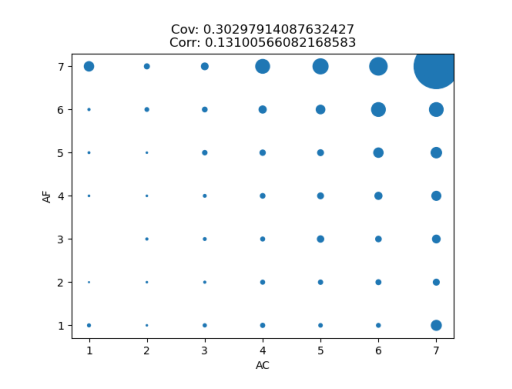

In [20]:
img = plt.imread('Pair_plots/AC_x_AF.png')
plt.imshow(img)
plt.axis('off')
plt.show()

## 6
We want to find if the correlation between each column with outcome, measured by pearson correlation coefficent is significant or not<br>
Performing the Hypothesis Test:
- Null Hypothesis: H0: `ρ = 0`
- Alternate Hypothesis: H1: `ρ ≠ 0`

parameters:
- our significance level is 5% ->  α = 0.05
- our samples number is 3770 -> N = 3770
- ρ -> population correlation coefficient (unknown)
- r -> sample correlation coefficient (known; calculated from sample data)
- df in this case -> (n-2) = 3668

The formula of the test statistic in this case is:
- t=(r√(n−2))/√(1−r2)
- t=(r√(df))/√(1−r2)

 https://stats.stackexchange.com/questions/120199/calculate-p-value-for-the-correlation-coefficient

In [14]:
threshold_neg = stats.t.ppf(0.005,df=3368)
threshold_pos = -stats.t.ppf(0.005,df=3368)
print(f"threshold is +- {threshold_pos}")

threshold is +- 2.5772898652524106


In [15]:
# getting all the correlation for t-test
outcome_correlations = {i:j[0] for i,j in outcome_cov_cor.items()}
outcome_correlations
res = []
epsilon = 5e-6 # avoiding dividing by zero error
for col,correlation in outcome_correlations.items():
    t = (correlation * np.sqrt(3668)) / (np.sqrt(1- correlation**2) + epsilon)
    # print(t, correlation)
    if (t>threshold_pos) or (t<threshold_neg):
        res.append((col,correlation))

res

[('outcome_x_B', -0.12102801113774066),
 ('outcome_x_C', 0.04920294982865287),
 ('outcome_x_E', -0.27013012420902477),
 ('outcome_x_F', -0.3814863077434754),
 ('outcome_x_G', -0.46071580328510336),
 ('outcome_x_H', -0.33427448316348163),
 ('outcome_x_I', -0.15221342747838443),
 ('outcome_x_J', -0.16872359231976614),
 ('outcome_x_K', -0.32448543260679813),
 ('outcome_x_L', -0.2725895783231537),
 ('outcome_x_O', -0.12946661852580904),
 ('outcome_x_P', -0.2812124593695038),
 ('outcome_x_S', -0.12653725844295266),
 ('outcome_x_T', -0.1485284629078432),
 ('outcome_x_V', -0.1723436323680277),
 ('outcome_x_W', -0.17995096879450506),
 ('outcome_x_X', -0.04732310108812534),
 ('outcome_x_Y', -0.21818367978684325),
 ('outcome_x_Z', -0.17321084214626736),
 ('outcome_x_AA', -0.15917001073535972),
 ('outcome_x_AC', -0.11941355051053285),
 ('outcome_x_AD', -0.289628134024022),
 ('outcome_x_AE', -0.46071580328510336),
 ('outcome_x_AF', -0.09138195016926291),
 ('outcome_x_AG', 0.04706511772195494),
 ('

## 7 , 8
- takes about 1 minutes
- In this part we want to display the confusion matrix
- if I use metrics.ConfusionMatrixDisplay for 2 columns with more than 2 values, for example n values, It will return n*n table with several values = 0, which is not required
- So we'll use sns.heatmap to get 2*n table because we have only 2 outcomes, 0 and 1

In [16]:
# This cell return n*n figures
confusion_matrices = {}
for col_x in data.columns:
    df = data.loc[:,[col_x, 'outcome']]
    cm = metrics.confusion_matrix(df.iloc[:,0], df.iloc[:,-1])    # no diffrence bitween -1 & 1
    name = col_x + '_x_outcome'
    confusion_matrices[name] = cm
    disp = metrics.ConfusionMatrixDisplay(cm)
    fig = disp.plot()
    fig.figure_.savefig('Conf_mat_n_n/' + name)
    plt.close()

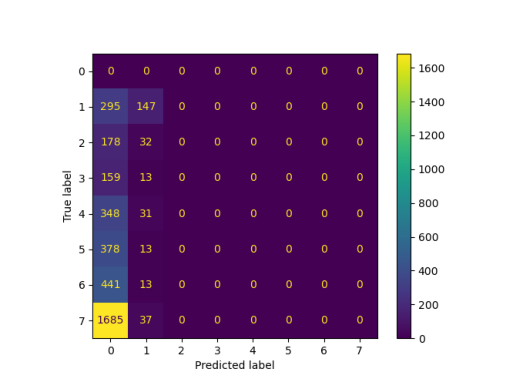

In [22]:
# Watch this messy picture for example
img = plt.imread('Conf_mat_n_n/H_x_outcome.png')
plt.imshow(img)
plt.axis('off')
plt.show()

### Conf_mat_un_normalized
`data.outcome.value_counts()`
- from the code above we can see that we have 286 outcome of 1 and 3484 outcome of 0
- we plot an 2*n confusion matrix

In [23]:
cm0 = []
cm1 = []
cm2 = []

confusion_matrices = {}
for column in data.columns[:-1]:
    df = data.loc[:,[column, 'outcome']]
    cm = metrics.confusion_matrix(y_true = df.iloc[:,1] ,y_pred = df.iloc[:,0])
    index = sorted(df.iloc[:,0].unique())
    # if index starts with 0, then cm row starts from 0 (2*2)    !!! Pay attention to total_k colummn !!!
    # if index starts with 1, then cm row starts from 1 
    # if index starts with 2 and more, then cm row starts from 2 

    
    if (index[0] == 0) and (len(index) > 2):
        cm = cm[:2, :]
        cm0.append((column,cm))

    elif index[0] == 0:
        cm = cm[:,:]
        cm0.append((column,cm))

    elif index[0] == 1:
        cm = cm[:2, 1:]
        cm1.append((column,cm))
        
    else:
        cm = cm[:2, 2:]
        cm2.append((column,cm))

    confusion_matrices[column] = cm

    # sns.set(font_scale=1.4)
    # if cm.shape[0] > 10:
    #     ax = sns.heatmap(cm, annot=True, fmt='g', annot_kws={'font-size': 14})

    
    plt.ioff()    #this force the cell to not show the plot unless I use plt.show()
    # print(cm) 
    fig, ax = plt.subplots()
    ax = sns.heatmap(cm, annot=True, fmt='g')
    ax.set_xlabel(column)
    ax.set_ylabel("outcome")
    ax.set_title('Confusion_matrix')
    
    # It wouldn't be clear if there are so many ticks to write
    if len(index) > 15:
        ax.set_xticklabels([])
    else:
        ax.set_xticklabels(index)

    ax.set_yticklabels([0,1])
    plt.savefig("Conf_mat_un_normalized/" + "CM_" + column)
    plt.close()    #Oppening more than 20 figures may consume too much memory
    # plt.show()


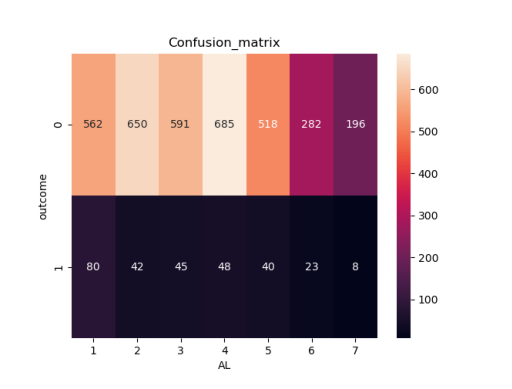

In [51]:
img1 = plt.imread('Conf_mat_un_normalized/CM_AL.png')
plt.imshow(img1)
plt.axis('off')
plt.show()

- We can't understand any relations bitween value distribution and outcome
- So we'll get a random sample from `outcome=1` as many `outcome=0`
- NOTE: because we are sampling randomly, the indexes with low values may miss   for example we only have one person with age 88 and may be our sample don't contain that
- we have 286 outcome of 0
## 9
- I will implement the 9th step here too
- we want to calculate sensetivity(Sen), Specificity(Spc), PPV and NPV of each column
- Sen = TP/(TP + FN)
- Spc = TN/(TN + FP)
- PPV = TP/(TP + FP)
- NPV = TN/(TN + FN)

In [27]:
confusion_matrices = {}
Confusion_details = {}

for column in data.columns[:-1]:
    df_total = data.loc[:,[column, 'outcome']]
    df1 = df_total.loc[df_total.outcome == 1]
    # from the code below we can see that we have 286 outcome of 1
    # data.outcome.value_counts()
    df0 = df_total.loc[df_total.outcome == 0].sample(n=286, random_state=42)
    df = pd.concat((df0, df1), axis=0)
    cm = metrics.confusion_matrix(y_true = df.iloc[:,1] ,y_pred = df.iloc[:,0])
    index = sorted(df.iloc[:,0].unique())
    # if index starts with 0, then cm row starts from 0 (2*2)    !!! Pay attention to columns with more than 2 values starting from 0 !!!
    # if index starts with 1, then cm row starts from 1 
    # if index starts with 2 and more, then cm row starts from 2 

    if (index[0] == 0) and (len(index) > 2):
        cm = cm[:2, :]
        
    elif index[0] == 0:
        cm = cm[:,:]

    elif index[0] == 1:
        cm = cm[:2, 1:]

    else:
        cm = cm[:2, 2:]


    confusion_matrices[column] = cm

    #### STAGE 9 STARTS FROM HERE ####
    for i in range(len(index)):
        test_true = cm[:,i]
        test_false_total = cm[:,[j for j in range(len(index)) if j != i]]
        test_false = test_false_total.sum(axis=1)

        # print code below to understand more
        # print(cm, test_true, test_false)
        TP = test_true[1]   
        FN = test_true[0]   
        TN = test_false[0]
        FP = test_false[1]

        Sen = TP/(TP + FN)
        Spc = TN/(TN + FP)
        PPV = TP/(TP + FP)
        NPV = TN/(TN + FN)

        Confusion_details[(column, index[i])] = (Sen, Spc, PPV, NPV)   
    #### END OF STAGE 9 ####
    
    plt.ioff()    #this force the cell to not show the plot unless I use plt.show()
    # print(cm) 
    fig, ax = plt.subplots()
    ax = sns.heatmap(cm, annot=True, fmt='g')
    ax.set_xlabel(column)
    ax.set_ylabel("outcome")
    ax.set_title('Confusion_matrix')

    if len(index) > 15:
        ax.set_xticklabels([])
    else:
        ax.set_xticklabels(index)

    plt.savefig("Conf_mat_normal/" + "CM_" + column)
    plt.close()    #Oppening more than 20 figures may consume too much memory
    # plt.show()


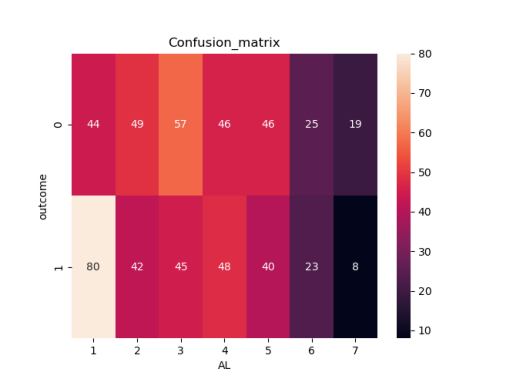

In [52]:
img2 = plt.imread('Conf_mat_normal/CM_AL.png')
plt.imshow(img2)
plt.axis('off')
plt.show()

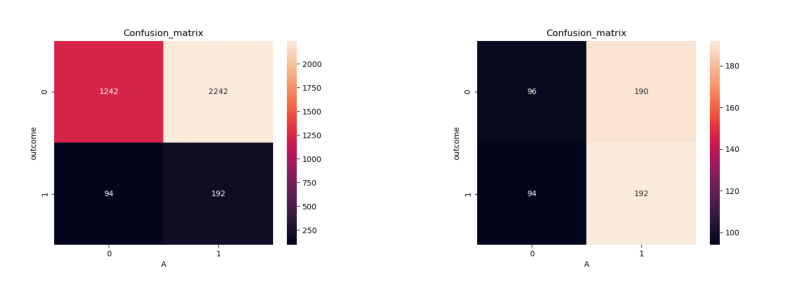

In [77]:
# comparing the two kind of Confusion Matrix plotted above
fig = plt.figure(figsize=(10,8)) 

fig.add_subplot(1, 2, 1)   
plt.imshow(plt.imread('Conf_mat_un_normalized\CM_A.png')) 
plt.axis('off') 

fig.add_subplot(1, 2, 2) 
plt.imshow(plt.imread('Conf_mat_normal\CM_A.png')) 
plt.axis('off') 

plt.show()

- by the first kind, we never could detect affecting of the feature in output, because occuring of the outcome has far less count, but by the second kind, we can detect if every entries has an obvious affect or not
- For example feaure A does not affect in outcome
- now we understand the importance of sampling from `outcome=0`

Creating dataframe to show confusion matrix details

In [67]:
index = pd.MultiIndex.from_tuples(Confusion_details.keys(), names = ['Column', 'Value'])
information = np.zeros((len(Confusion_details),4))
for i in range(len(Confusion_details)):
    information[i] = [i for i in Confusion_details.values()][i]
# if U want to tream values with 3 digits run code below
# np.round(information,3)

categorical_multi_index_df = pd.DataFrame(information, index=index, columns=['Sen', 'Spc', 'PPV', 'NPV'])
categorical_multi_index_df

Sen       Spc       PPV       NPV
Column Value                                        
A      0      0.494737  0.497382  0.328671  0.664336
       1      0.502618  0.505263  0.671329  0.335664
B      0      0.620536  0.577586  0.486014  0.702797
       1      0.422414  0.379464  0.513986  0.297203
C      0      0.425121  0.457534  0.307692  0.583916
...                ...       ...       ...       ...
BX     3      0.789474  0.509946  0.052448  0.986014
       4      0.720000  0.521073  0.125874  0.951049
       5      0.357143  0.484496  0.069930  0.874126
       6      0.200000  0.458167  0.048951  0.804196
       7      0.216080  0.348525  0.150350  0.454545

[901 rows x 4 columns]

## 10
- for example we have values [1,2,3,4,5,6,7]
- we can devide these as follows:
    - less than value i, i and more than i
    - `[1] , [2,3,4,5,6,7]`
    - `[1,2] , [3,4,5,6,7]`
    - `[1,2,3] , [4,5,6,7]`
    - `[1,2,3,4] , [5,6,7]`
    - `[1,2,3,4,5] , [6,7]`
    - `[1,2,3,4,5,6] , [7]`
- and again calculate those 4 values Sen, Spc, PPV, NPV

In [78]:
confusion_matrices = {}
Confusion_details = {}

for column in data.columns[:-1]:
    df_total = data.loc[:,[column, 'outcome']]
    df1 = df_total.loc[df_total.outcome == 1]
    # from the code below we can see that we have 286 outcome of 1
    # data.outcome.value_counts()
    df0 = df_total.loc[df_total.outcome == 0].sample(n=286, random_state=42)
    df = pd.concat((df0, df1), axis=0)
    cm = metrics.confusion_matrix(y_true = df.iloc[:,1] ,y_pred = df.iloc[:,0])
    index = sorted(df.iloc[:,0].unique())
    # if index starts with 0, then cm row starts from 0 (2*2)    !!! Pay attention to total_k colummn !!!
    # if index starts with 1, then cm row starts from 1 
    # if index starts with 2 and more, then cm row starts from 2 

    if column == 'total_k':
        cm = cm[:2, :]
        
    elif index[0] == 0:
        cm = cm[:,:]
 
    elif index[0] == 1:
        cm = cm[:2, 1:]

    else:
        cm = cm[:2, 2:]

    confusion_matrices[column] = cm

    for i in range(1, len(index)):    #NOTICE THE CHANGE IN THE RANGE FROM BEFORE
        test_true_total = cm[:, :i]
        test_true = test_true_total.sum(axis=1)
        test_false_total = cm[:, i:]
        test_false = test_false_total.sum(axis=1)

        TP = test_true[1]   
        FN = test_true[0]   
        TN = test_false[0]
        FP = test_false[1]

        Sen = TP/(TP + FN)
        Spc = TN/(TN + FP)
        PPV = TP/(TP + FP)
        NPV = TN/(TN + FN)

        # if i == 0:
        #     to_this = str(index[0])
        # from_this = str()
        # if i == len(index)-1:
        #     from_this = str(index[i])
        # to_this = str(index[0]) + 
        Confusion_details[(column,(index[i-1] + 0.1))] = (Sen, Spc, PPV, NPV)   
    
index = pd.MultiIndex.from_tuples(Confusion_details.keys(), names = ['Column', 'Value'])
information = np.zeros((len(Confusion_details),4))
for i in range(len(Confusion_details)):
    information[i] = [i for i in Confusion_details.values()][i]
# if U want to tream values with 3 digits run code below
# np.round(information,3)

quantitative_multi_index_df = pd.DataFrame(information, index=index, columns=['Sen', 'Spc', 'PPV', 'NPV'])
quantitative_multi_index_df 

Sen       Spc       PPV       NPV
Column Value                                        
A      0.1    0.494737  0.497382  0.328671  0.664336
B      0.1    0.620536  0.577586  0.486014  0.702797
C      0.1    0.425121  0.457534  0.307692  0.583916
D      1.1    0.532020  0.517615  0.377622  0.667832
       2.1    0.520619  0.543478  0.706294  0.349650
...                ...       ...       ...       ...
BX     2.1    0.887640  0.675127  0.552448  0.930070
       3.1    0.878173  0.698667  0.604895  0.916084
       4.1    0.846154  0.763077  0.730769  0.867133
       5.1    0.755776  0.788104  0.800699  0.741259
       6.1    0.651475  0.783920  0.849650  0.545455

[825 rows x 4 columns]

# Divide and conquere
## 11
- here we will prodce 2 dictionaries `quantitative_dfs`, `quantitative_dfs`
- each have 4 keys `Sen, Spc, PPV, NPV`
- for each key the value is the dataframe in its kind, sorted by its key
- for example `quantitative_df` sorted by `Spc` for each outer level index
- We face witth some issues because:
    - indexes are immutable (frozen list)

- We follow these steps to the above:
    1) change df to a single indexed with index level=0
    2) mask the df by the index level=0 (it was calumns' name)
    3) sort W.R.T column we want, for example PPV
    4) replacement the sorted mask to the original df
    5) returning result to multi_indexed df

binary columns only have 1 row in these modifications, So we have to continue the loop if the column is binary
So for the computational cost reasons we don't loop on them

In [79]:
# has done before
column_names = list(data.columns)[:-1]    # excepting the outcome column
binary_columns = []
for col in column_names:
    df = data.loc[:,col]
    uniques = set(df.unique())
    if uniques == {0,1}:
        binary_columns.append(col)


all_columns = categorical_multi_index_df.index.get_level_values(level=0).unique()
non_binary_columns = [i for i in all_columns if i not in binary_columns]

In [80]:
# a = categorical_df.sort_values(by = ['PPV'], ascending=[False]).sort_index(level=0) \ doesn't do our task
quantitative_dfs = {}
categorical_dfs = {}
i = 0
for info in ['Sen', 'Spc', 'PPV', 'NPV']: 
    # print(i)
    # i+=1
    quantitative_df = quantitative_multi_index_df.copy(deep=True)
    categorical_df = categorical_multi_index_df.copy(deep=True)

    # change df to a single indexed with index level=0
    quantitative_df.reset_index(level = 1, inplace = True)
    categorical_df.reset_index(level = 1, inplace = True)

    for column in non_binary_columns:    #for example Age, Sex and...

        # mask the df by the index level=0 (it was calumns' name)
        Q_df = quantitative_df.loc[column, :]
        C_df = categorical_df.loc[column, :]


        # sort W.R.T column we want, for example PPV
        Q_df.sort_values(by = info, ascending = False, inplace=True)
        C_df.sort_values(by = info, ascending = False, inplace=True)

        # replacement the sorted mask to the original df
        quantitative_df.loc[column] = Q_df
        categorical_df.loc[column] = C_df

    # returning result to multi_indexed df
    quantitative_df.set_index(['Value'], append = True, inplace = True)
    categorical_df.set_index(['Value'], append = True, inplace = True)

    # place the modified df inside the dictionary
    quantitative_dfs[info] = quantitative_df
    categorical_dfs[info] = categorical_df

a = quantitative_dfs['Spc'] # categorical_df['Spc']
a

Sen       Spc       PPV       NPV
Column Value                                        
A      0.1    0.494737  0.497382  0.328671  0.664336
B      0.1    0.620536  0.577586  0.486014  0.702797
C      0.1    0.425121  0.457534  0.307692  0.583916
D      2.1    0.520619  0.543478  0.706294  0.349650
       1.1    0.532020  0.517615  0.377622  0.667832
...                ...       ...       ...       ...
BX     6.1    0.651475  0.783920  0.849650  0.545455
       4.1    0.846154  0.763077  0.730769  0.867133
       3.1    0.878173  0.698667  0.604895  0.916084
       2.1    0.887640  0.675127  0.552448  0.930070
       1.1    0.924812  0.628702  0.430070  0.965035

[825 rows x 4 columns]

# 12
- Finding the best answer for each col as most sensitive, most specific, and PPv and NPV
- a dictionary named `best_answers` contain 4 keys: `Sen, Spc, PPV and NPV`
- We have 76 columns and want to find the best value and the kind of the value (Categorical or Quantitative)
- kind is either `Categorical`, `Quantitative`, or `Both`

In [81]:
best_answers = {}


for info in ['Sen', 'Spc', 'PPV', 'NPV']:
    
    df = pd.DataFrame(np.zeros((76,5)), columns=['Column','kind', 'C_value', 'Q_value', info]).set_index('Column')
    df.index = all_columns

    C_df = categorical_dfs[info]
    Q_df = quantitative_dfs[info]
    
    for column in all_columns:
        # print(df.loc[column])
        #Comparig the value of info
        C_value = C_df.loc[column, info].values[0]    #biggest value is in place 0
        Q_value = Q_df.loc[column, info].values[0]    #biggest value is in place 0

        if C_value > Q_value:
            df.loc[column] = ['Categorical', C_df.loc[column, info].index[0], None, C_value]

        elif C_value < Q_value:
            df.loc[column] = ['Quantitative', None, Q_df.loc[column, info].index[0], Q_value]
            
        elif C_value == Q_value:
            df.loc[column] = ['Both', C_df.loc[column, info].index[0], Q_df.loc[column, info].index[0], C_value]
    
    best_answers[info] = df

best_answers['Sen']

,kind,C_value,Q_value,Sen
Column,,,,
A,Both,0.0,0.1,0.494737
B,Both,0.0,0.1,0.620536
C,Both,0.0,0.1,0.425121
D,Both,1.0,1.1,0.532020
E,Both,1.0,1.1,0.933333
...,...,...,...,...
BT,Categorical,5.0,NaN,0.857143
BU,Both,1.0,1.1,0.945312
BV,Both,2.0,2.1,0.782258


Checking if we get BOTH kinds with same values

In [88]:
for info in ['Sen', 'Spc', 'PPV', 'NPV']:
    print((best_answers[info].kind == 'Both').sum())

55
20
17
31


There is Some similarities, So We can't modify the dataframe more or we well lose data

# The Learning Algorithm will be on another notebook